# Engilish-Devnagri-Digit Character Recognition Model 

### Import keras libraries

In [40]:
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dense, BatchNormalization,Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D,Activation
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.optimizers import SGD, Adam
from keras import backend as k
from keras.models import load_model
from keras.models import Sequential
from PIL import Image
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import backend as K
import os
from matplotlib.pyplot import imshow

In [41]:
%matplotlib inline

In [3]:
def get_digit_model():
    model = Sequential()
    num_classes = 10
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    adam = Adam(lr=0.0001)
    model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
   # model = get_digit_model()
    model =load_model('cnn.h5')
    return model
 

In [53]:
def get_digit(image_location):
    model = get_digit_model()
    image = Image.open('Digits/img009-035.png')
    image = image.resize((28,28),Image.ANTIALIAS).convert('L')
    image1 = np.array(image)
    image1.resize(28,28,1)
    predict = np.zeros([1,28,28,1])
    predict[0] = image1
   
    return np.argmax( model.predict(predict))




In [6]:
def load_image(src):
    image = Image.open(src)
    image = image.resize((64,64), Image.ANTIALIAS)
    resnet_image = (np.array(image.getdata()).reshape(image.size[0], image.size[1], 3))/255
    to_crop = image.resize((64,64),Image.ANTIALIAS)
    n_array = np.array(to_crop)
    top_image = Image.fromarray(n_array[:15,:])
    top_image = top_image.resize((64,64),Image.ANTIALIAS)
    top_image =(np.array(top_image.getdata()).reshape(image.size[0], image.size[1], 3))/255
    to_crop = image.resize((32,32),Image.ANTIALIAS)
    n_array = np.array(to_crop)
    bottom_image = Image.fromarray(n_array[25:,:])
    bottom_image = bottom_image.resize((64,64),Image.ANTIALIAS)
    bottom_image =(np.array(bottom_image.getdata()).reshape(image.size[0], image.size[1], 3))/255
    vertical_image = Image.fromarray(n_array[:,19:])
    vertical_image = vertical_image.resize((64,64),Image.ANTIALIAS)
    vertical_image =(np.array(vertical_image.getdata()).reshape(image.size[0], image.size[1], 3))/255
    return [resnet_image,top_image,bottom_image,vertical_image]


In [17]:
def get_resnet_model():
  
  num_classes = 50
  base_model = applications.resnet50.ResNet50(weights= None, include_top=False)
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.7)(x)
  predictions = Dense(num_classes, activation= 'softmax')(x)
  model = Model(inputs = base_model.input, outputs = predictions)
 
  #sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
  adam = Adam(lr=0.0001)
  model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
  model.load_weights('D:\\cvpr\\mser\\final_model_fold3_weights.h5')
  return model


In [21]:
def top_model():
    model = Sequential()
    num_classes =6
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='relu'))
    adam = Adam(lr=0.0001)
    model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
    model.load_weights('D:\\cvpr\\matras\\Top_weights\\Top_model_fold0_weights.h5')
    return model

In [9]:
def bottom_model():
    model = Sequential()
    num_classes =3
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='relu'))
    adam = Adam(lr=0.0001)
    model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
    model.load_weights('D:\\cvpr\matras\Bottom_weights\\Bottom_model_fold2_weights.h5')
    return model

In [14]:
def vertical_model():
    model = Sequential()
    num_classes=5
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='relu'))
    adam = Adam(lr=0.0001)
    model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
    model.load_weights('D:\\cvpr\\matras\\Vertical_weights\\Vertical_model_fold7_weights.h5')
    return model    


In [15]:
def predict_dev(image_loc):
    resnet_model = get_resnet_model()
    top = top_model()
    Bottom = bottom_model()
    vertical = vertical_model()
    #%% Label encoder
    filelist_resent=os.listdir('F:\\cvpr\\consonants')    
    from sklearn import preprocessing
    resnet_label = preprocessing.LabelEncoder()
    resnet_label.fit(filelist_resent)
    #%%
    filelist_top=os.listdir('F:\\cvpr\\matras\\Top')   

    top_label = preprocessing.LabelEncoder()
    top_label.fit(filelist_top)
    #%%
    filelist_bottom=os.listdir('F:\\cvpr\\matras\\Bottom')    
    #filelist_temp = filelist_bottom[10:]
    #filelist_temp.append(filelist_top[10]) 
    from sklearn import preprocessing
    bottom_label = preprocessing.LabelEncoder()
    bottom_label.fit(filelist_bottom)
    #%%
    filelist_vertical=os.listdir('F:\\cvpr\\matras\\Vertical')   

    from sklearn import preprocessing
    vertical_label = preprocessing.LabelEncoder()
    vertical_label.fit(filelist_vertical)  
    img = load_image(image_loc)
    x = image.img_to_array(img[0])
    arr = np.zeros([1,64,64,3])
    arr[0] =x
    import matplotlib.pyplot as plt
    plt.imshow(img[0])

    preds = resnet_model.predict(arr)
    index = np.argmax(preds)
    word = resnet_label.inverse_transform([index])
    print(word)
    top_image =image.img_to_array(img[1])
    y = image.img_to_array(img[1])
    arr_top = np.zeros([1,64,64,3])
    arr_top[0] =y
    preds_top = top.predict(arr_top)
    index = np.argmax(preds_top)
    word = top_label.inverse_transform([index])
    print(word)

    bottom_image =image.img_to_array(img[2])
    y = image.img_to_array(img[2])
    arr_top = np.zeros([1,64,64,3])
    arr_top[0] =y
    preds_bottom = Bottom.predict(arr_top)
    index = np.argmax(preds_bottom)
    word = bottom_label.inverse_transform([index])
    print(word)
    vertical_image =image.img_to_array(img[3])
    y = image.img_to_array(img[3])
    arr_top = np.zeros([1,64,64,3])
    arr_top[0] =y
    preds_vertical = vertical.predict(arr_top)
    index = np.argmax(preds_vertical)
    word = vertical_label.inverse_transform([index])
    print(word)
    
    

In [27]:
def get_resnet_model_recog():
    img_height,img_width = 64,64 
    num_classes = 3
    base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.7)(x)
    predictions = Dense(num_classes, activation= 'softmax')(x)
    model = Model(inputs = base_model.input, outputs = predictions)

    # sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    adam = Adam(lr=0.0001)
    model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
    model.load_weights('intern_task_1_weights.h5')
    return model            


In [33]:
def  predict_type(image_loc):
    image = Image.open(image_loc,'r')
    image = image.resize((64,64),Image.ANTIALIAS)
    image1 = np.array(image)[...,:3]
    predict = np.zeros([1,64,64,3])
    predict[0] = image1
    model =  get_resnet_model_recog()
    return np.argmax(model.predict(predict))
#predict[0] = X_train[5106:5656]

In [49]:
def predict_image(image_loc):
    check = predict_type(image_loc)
    image = Image.open(image_loc).convert('L')
    imshow(np.asarray(image))
    if(check == 0):
        print('\nIt is an hindi word')
        predict_dev(image_loc)
    if(check ==1):
        print('\nIt is a Digit and it is ')
        print(get_digit(image_loc))
    if(check ==2):
        print('\nIt is a English word and model is yet to be loaded')
        

### Results


In [60]:
import pandas as pd
data =[['Image Type Classifier(Image,Digits,Devnagri)','96%'],['Devnagri word Detector','86%'],['Digit Recognizer','91%']]
df = pd.DataFrame(data,columns=['Classifier','Accuray'])
df.style.set_properties(subset=['Classifier'], **{'width': '1000px'})
df

,Classifier,Accuray
0,"Image Type Classifier(Image,Digits,Devnagri)",96%
1,Devnagri word Detector,86%
2,Digit Recognizer,91%


### A hindi Word

D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '



It is an hindi word


D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['Ha']


D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['no_matras']


D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['no_matras']


D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['no_matras']


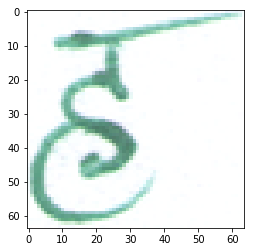

In [45]:
predict_image('Ha.png')


### An English Word

D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '



It is a English word and model is yet to be loaded


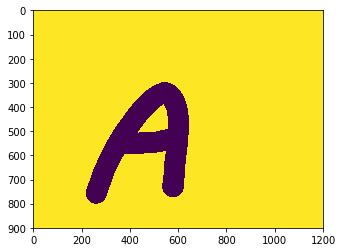

In [46]:
predict_image('Letters\img011-001.png')

### A digit 

D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '



It is a Digit and it is 


D:\ProgramData\Anaconda3\envs\forjupyter\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


9


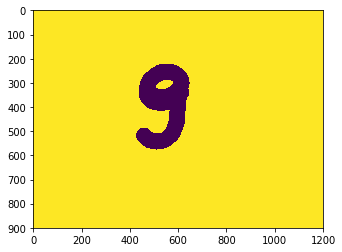

In [54]:
predict_image('Digits/img010-054.png')